In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/nedeinlein/Machine_Learning_I/main/runs_clean.csv")


In [2]:
df.head()

,Unnamed: 0,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,...,behind_sec2,behind_sec3,time1,time2,time3,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,...,2.00,1.50,13.85,21.59,23.86,83.92,9.7,3.7,118,2
1,1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,...,9.00,5.00,14.57,21.99,23.30,83.56,16.0,4.9,164,57
2,2,0,3,858,7,0.0,4.75,3,NZ,Gelding,...,1.00,0.75,13.69,21.59,23.90,83.40,3.5,1.5,137,18
3,3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,...,5.00,3.50,14.09,21.83,23.70,83.62,39.0,11.0,80,59
4,4,0,5,2796,6,0.0,3.75,3,GB,Gelding,...,8.75,4.25,14.77,21.75,23.22,83.24,50.0,14.0,9,154


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79423 entries, 0 to 79422
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       79423 non-null  int64  
 1   race_id          79423 non-null  int64  
 2   horse_no         79423 non-null  int64  
 3   horse_id         79423 non-null  int64  
 4   result           79423 non-null  int64  
 5   won              79423 non-null  float64
 6   lengths_behind   79423 non-null  float64
 7   horse_age        79423 non-null  int64  
 8   horse_country    79423 non-null  object 
 9   horse_type       79423 non-null  object 
 10  horse_rating     79423 non-null  int64  
 11  horse_gear       79423 non-null  object 
 12  declared_weight  79423 non-null  float64
 13  actual_weight    79423 non-null  int64  
 14  draw             79423 non-null  int64  
 15  position_sec1    79423 non-null  int64  
 16  position_sec2    79423 non-null  int64  
 17  position_sec

3 object categorical features (horse_country,horse_type,horse_gear). Deleting horse gear due to lots of missing information in original dataset. 

In [4]:
del df['horse_gear']


In [5]:
df[['horse_country','horse_type']].describe().transpose()

,count,unique,top,freq
horse_country,79423,16,AUS,29896
horse_type,79423,9,Gelding,75481


In [6]:
df_imputed = df.select_dtypes(include=[object])
df_imputed.head(3)

,horse_country,horse_type
0,AUS,Gelding
1,NZ,Gelding
2,NZ,Gelding


In [7]:
tmp_df = pd.get_dummies(df_imputed, columns = ['horse_country','horse_type'])
tmp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79423 entries, 0 to 79422
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   horse_country_ARG   79423 non-null  uint8
 1   horse_country_AUS   79423 non-null  uint8
 2   horse_country_BRZ   79423 non-null  uint8
 3   horse_country_CAN   79423 non-null  uint8
 4   horse_country_FR    79423 non-null  uint8
 5   horse_country_GB    79423 non-null  uint8
 6   horse_country_GER   79423 non-null  uint8
 7   horse_country_GR    79423 non-null  uint8
 8   horse_country_IRE   79423 non-null  uint8
 9   horse_country_ITY   79423 non-null  uint8
 10  horse_country_JPN   79423 non-null  uint8
 11  horse_country_NZ    79423 non-null  uint8
 12  horse_country_SAF   79423 non-null  uint8
 13  horse_country_SPA   79423 non-null  uint8
 14  horse_country_USA   79423 non-null  uint8
 15  horse_country_ZIM   79423 non-null  uint8
 16  horse_type_Brown    79423 non-null  uint

In [8]:
df_imputed = pd.concat((df,tmp_df),axis=1)
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79423 entries, 0 to 79422
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          79423 non-null  int64  
 1   race_id             79423 non-null  int64  
 2   horse_no            79423 non-null  int64  
 3   horse_id            79423 non-null  int64  
 4   result              79423 non-null  int64  
 5   won                 79423 non-null  float64
 6   lengths_behind      79423 non-null  float64
 7   horse_age           79423 non-null  int64  
 8   horse_country       79423 non-null  object 
 9   horse_type          79423 non-null  object 
 10  horse_rating        79423 non-null  int64  
 11  declared_weight     79423 non-null  float64
 12  actual_weight       79423 non-null  int64  
 13  draw                79423 non-null  int64  
 14  position_sec1       79423 non-null  int64  
 15  position_sec2       79423 non-null  int64  
 16  posi

In [9]:
if 'horse_country' in df_imputed:
    del df_imputed['horse_country'] # if 'horse country' column still exists, delete it 
    
if 'horse_type' in df_imputed:    
    del df_imputed['horse_type'] # if 'horse type' column still exists, delete it
    
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79423 entries, 0 to 79422
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          79423 non-null  int64  
 1   race_id             79423 non-null  int64  
 2   horse_no            79423 non-null  int64  
 3   horse_id            79423 non-null  int64  
 4   result              79423 non-null  int64  
 5   won                 79423 non-null  float64
 6   lengths_behind      79423 non-null  float64
 7   horse_age           79423 non-null  int64  
 8   horse_rating        79423 non-null  int64  
 9   declared_weight     79423 non-null  float64
 10  actual_weight       79423 non-null  int64  
 11  draw                79423 non-null  int64  
 12  position_sec1       79423 non-null  int64  
 13  position_sec2       79423 non-null  int64  
 14  position_sec3       79423 non-null  int64  
 15  behind_sec1         79423 non-null  float64
 16  behi

In [10]:
#going to create new variable 'show bets' based off of result = 1,2, or 3

conditions = [df_imputed['result'] <4 , df_imputed['result']>3]
choices = [1,0]
df_imputed['show_bet'] = np.select(conditions,choices, df_imputed['result'])

df_imputed.head(20)

,Unnamed: 0,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_rating,declared_weight,...,horse_type_Brown,horse_type_Colt,horse_type_Filly,horse_type_Gelding,horse_type_Grey,horse_type_Horse,horse_type_Mare,horse_type_Rig,horse_type_Roan,show_bet
0,0,0,1,3917,10,0.0,8.00,3,60,1020.0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,2,2157,8,0.0,5.75,3,60,980.0,...,0,0,0,1,0,0,0,0,0,0
2,2,0,3,858,7,0.0,4.75,3,60,1082.0,...,0,0,0,1,0,0,0,0,0,0
3,3,0,4,1853,9,0.0,6.25,3,60,1118.0,...,0,0,0,1,0,0,0,0,0,0
4,4,0,5,2796,6,0.0,3.75,3,60,972.0,...,0,0,0,1,0,0,0,0,0,0
5,5,0,6,3296,3,0.0,1.25,3,60,1114.0,...,0,0,0,1,0,0,0,0,0,1
6,6,0,7,911,12,0.0,9.50,3,60,978.0,...,0,0,0,1,0,0,0,0,0,0
7,7,0,8,2170,1,1.0,0.00,3,60,1170.0,...,0,0,0,1,0,0,0,0,0,1
8,8,0,9,1730,13,0.0,9.75,3,60,1126.0,...,0,0,0,1,0,0,0,0,0,0
9,9,0,10,2998,14,0.0,999.00,3,60,1072.0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
# don't need these columns anymore since they are unknown as bets are placed 
del df_imputed['result']
del df_imputed['won']
del df_imputed['Unnamed: 0']
del df_imputed['race_id']
del df_imputed['position_sec1']
del df_imputed['position_sec2']
del df_imputed['position_sec3']
del df_imputed['behind_sec1']
del df_imputed['behind_sec2']
del df_imputed['behind_sec3']
del df_imputed['time1']
del df_imputed['time2']
del df_imputed['time3']
del df_imputed['finish_time']
del df_imputed['win_odds']

df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79423 entries, 0 to 79422
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   horse_no            79423 non-null  int64  
 1   horse_id            79423 non-null  int64  
 2   lengths_behind      79423 non-null  float64
 3   horse_age           79423 non-null  int64  
 4   horse_rating        79423 non-null  int64  
 5   declared_weight     79423 non-null  float64
 6   actual_weight       79423 non-null  int64  
 7   draw                79423 non-null  int64  
 8   place_odds          79423 non-null  float64
 9   trainer_id          79423 non-null  int64  
 10  jockey_id           79423 non-null  int64  
 11  horse_country_ARG   79423 non-null  uint8  
 12  horse_country_AUS   79423 non-null  uint8  
 13  horse_country_BRZ   79423 non-null  uint8  
 14  horse_country_CAN   79423 non-null  uint8  
 15  horse_country_FR    79423 non-null  uint8  
 16  hors

In [12]:
#test & train splitting
from sklearn.model_selection import ShuffleSplit

if 'show_bet' in df_imputed:
    y = df_imputed['show_bet'].values
    del df_imputed['show_bet']
    X = df_imputed.values

num_cv_iterations = 10
num_instances = len(y)
cv_object = ShuffleSplit(n_splits = num_cv_iterations, test_size = .2, random_state = 0)

print(cv_object)

ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt 

lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' )

iter_num = 0
for train_indices, test_indices in cv_object.split(X,y):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    lr_clf.fit(X_train,y_train)
    y_hat = lr_clf.predict(X_test)
    
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)

    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1

====Iteration 0  ====
accuracy 0.9073339628580421
confusion matrix
 [[11514   683]
 [  789  2899]]
====Iteration 1  ====
accuracy 0.9087818696883853
confusion matrix
 [[11455   618]
 [  831  2981]]
====Iteration 2  ====
accuracy 0.9077746301542335
confusion matrix
 [[11462   668]
 [  797  2958]]
====Iteration 3  ====
accuracy 0.9097261567516525
confusion matrix
 [[11424   639]
 [  795  3027]]
====Iteration 4  ====
accuracy 0.9093484419263456
confusion matrix
 [[11407   639]
 [  801  3038]]
====Iteration 5  ====
accuracy 0.908089392508656
confusion matrix
 [[11379   684]
 [  776  3046]]
====Iteration 6  ====
accuracy 0.9050676739062008
confusion matrix
 [[11353   653]
 [  855  3024]]
====Iteration 7  ====
accuracy 0.9123072080579163
confusion matrix
 [[11531   647]
 [  746  2961]]
====Iteration 8  ====
accuracy 0.907711677683349
confusion matrix
 [[11339   681]
 [  785  3080]]
====Iteration 9  ====
accuracy 0.9071451054453887
confusion matrix
 [[11389   641]
 [  834  3021]]


In [14]:
#interpretting weights
# iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = df_imputed.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

horse_no has weight of 0.0095591344438277
horse_id has weight of -3.3152380252258954e-06
lengths_behind has weight of -1.4924082396729765
horse_age has weight of 0.012041445866968904
horse_rating has weight of -0.003494321258262761
declared_weight has weight of 0.001486158480278161
actual_weight has weight of 0.01060210520261141
draw has weight of -0.003549201798577074
place_odds has weight of -0.06895357823446657
trainer_id has weight of -0.0004652736903367685
jockey_id has weight of -4.6883312997428714e-05
horse_country_ARG has weight of 0.00046941143143531806
horse_country_AUS has weight of -0.0075778458699354324
horse_country_BRZ has weight of -0.00022747614603815802
horse_country_CAN has weight of -0.0007150744695812519
horse_country_FR has weight of 0.0008897189320070317
horse_country_GB has weight of -0.006946281490709989
horse_country_GER has weight of -0.00030033960150948155
horse_country_GR has weight of -9.069316479148481e-05
horse_country_IRE has weight of -0.00238223156102

In [15]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05, solver='liblinear') # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,df_imputed.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 0.9018570978910923
[[11622   408]
 [ 1151  2704]]
lengths_behind has weight of -17.432232922774244
place_odds has weight of -0.9562170102124808
jockey_id has weight of -0.021492397879919398
draw has weight of -0.020391774406545098
horse_rating has weight of -0.019419930117943608
horse_type_Rig has weight of -0.017767225830860052
horse_no has weight of -0.01686095563247687
horse_country_ITY has weight of -0.01617974198731964
horse_country_BRZ has weight of -0.012055685097279775
horse_country_CAN has weight of -0.010776120165568141
horse_type_Roan has weight of -0.01002137703890262
trainer_id has weight of -0.007971970783667914
horse_country_GER has weight of -0.007494007544584004
horse_type_Grey has weight of -0.0070474042076903
horse_country_GB has weight of -0.006691665501666503
horse_id has weight of -0.006410172179672526
horse_country_GR has weight of -0.005226752445005624
horse_country_IRE has weight of -0.00517906404006035
horse_type_Mare has weight of -0.005123097748675

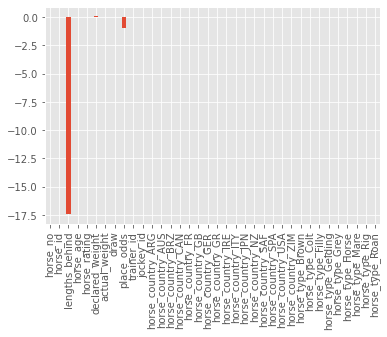

In [16]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=df_imputed.columns)
weights.plot(kind='bar')
plt.show()